Assignment 4: Use the dataset containing GRE scores, GPA, and Rank to build a machine learning model that predicts whether a student will be admitted to a university. Perform exploratory data analysis, visualize the distributions, train a classification model, and evaluate its performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import io
import requests

In [10]:
print(df.describe())
print(df.mean())
print(df.median())
print(df.count())
print(df.sum())


        GRE Score         GPA       Rank       Admit
count  400.000000  400.000000  400.00000  400.000000
mean   587.700000    3.389900    2.48500    0.317500
std    115.516536    0.380567    0.94446    0.466087
min    220.000000    2.260000    1.00000    0.000000
25%    520.000000    3.130000    2.00000    0.000000
50%    580.000000    3.395000    2.00000    0.000000
75%    660.000000    3.670000    3.00000    1.000000
max    800.000000    4.000000    4.00000    1.000000
GRE Score    587.7000
GPA            3.3899
Rank           2.4850
Admit          0.3175
dtype: float64
GRE Score    580.000
GPA            3.395
Rank           2.000
Admit          0.000
dtype: float64
GRE Score    400
GPA          400
Rank         400
Admit        400
dtype: int64
GRE Score    235080.000000
GPA            1355.960003
Rank            994.000000
Admit           127.000000
dtype: float64


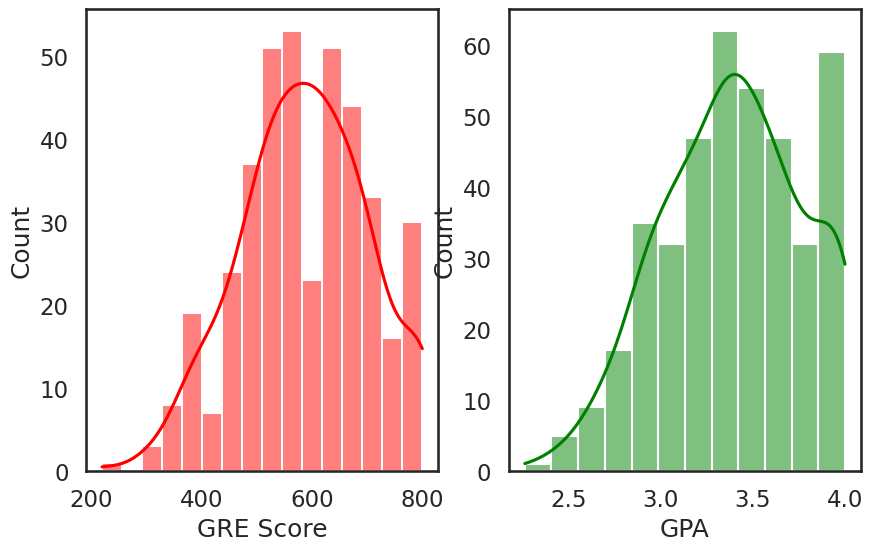

In [13]:
sns.set(style="white", context="talk")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(df['GRE Score'], kde=True, ax=ax1, color="red")
sns.histplot(df['GPA'], kde=True, ax=ax2, color="green")
plt.show()


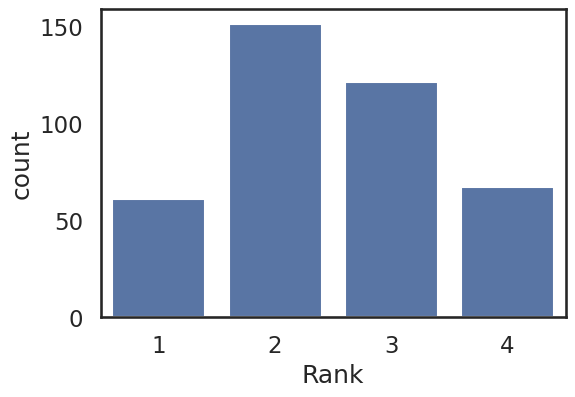

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Rank', data=df)
plt.show()


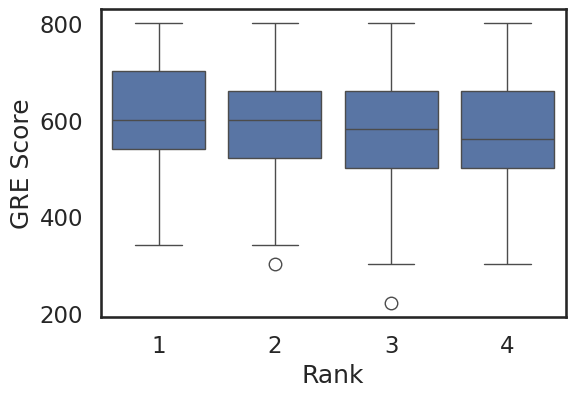

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Rank', y='GRE Score', data=df)
plt.show()


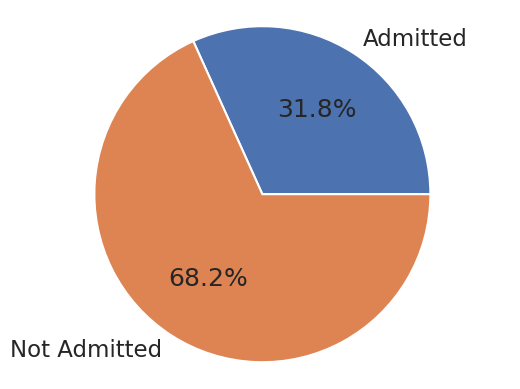

In [16]:
labels = ['Admitted', 'Not Admitted']
sizes = [df['Admit'].sum(), len(df) - df['Admit'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


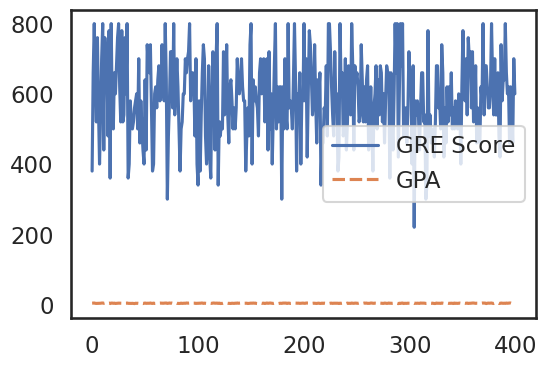

In [17]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=df[['GRE Score', 'GPA']])
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

X = df[['GRE Score', 'GPA', 'Rank']]
y = df['Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6625
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79        53
         1.0       0.50      0.07      0.13        27

    accuracy                           0.66        80
   macro avg       0.59      0.52      0.46        80
weighted avg       0.61      0.66      0.57        80



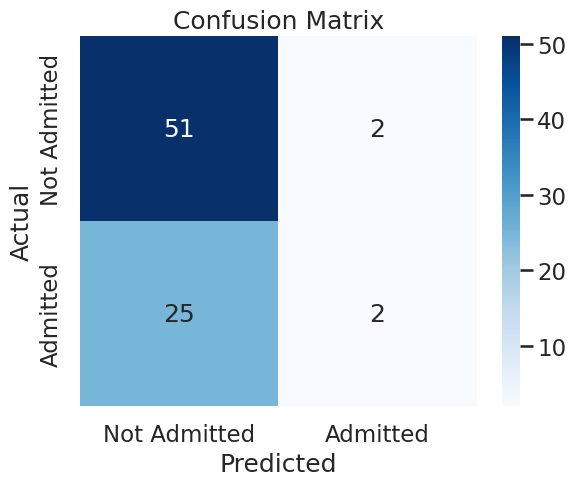

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
